In [214]:
import pandas as pd
import numpy as np

In [215]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [216]:
df = pd.read_csv(data)

In [217]:
df.shape

(9704, 11)

In [218]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


# **Solution 1**

In [219]:
cols_list = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [220]:
df[cols_list].isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0


# **Solution 2**

In [221]:
df.horsepower.median()

149.0

# **Solution 3**

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
vars = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[vars]

In [224]:
print(df['fuel_efficiency_mpg'].describe())

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64


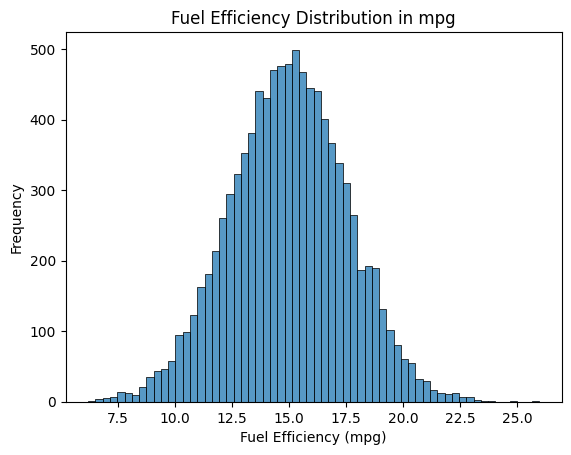

In [225]:
plot = sns.histplot(df['fuel_efficiency_mpg'])
plot.set_xlabel('Fuel Efficiency (mpg)')
plot.set_ylabel('Frequency')
plot.set_title('Fuel Efficiency Distribution in mpg')
plt.show()

In [226]:
df = df.sample(frac=1, random_state=42)

In [227]:
n = len(df)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

In [228]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [229]:
print(f'Train size {len(df_train)}, Val size: {len(df_val)}, Test size: {len(df_test)}')

Train size 5822, Val size: 1940, Test size: 1942


In [230]:
hp_mean = df_train['horsepower'].mean()

In [231]:
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)

In [232]:
df_train_mean = df_train.fillna(hp_mean)
df_val_mean = df_val.fillna(hp_mean)

In [233]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [234]:
model_0 = LinearRegression()
model_0.fit(df_train_0[features], df_train_0['fuel_efficiency_mpg'])
pred_0 = model_0.predict(df_val_0[features])
rmse_0 = np.sqrt(mean_squared_error(df_val_0['fuel_efficiency_mpg'], pred_0))

In [235]:
model_mean = LinearRegression()
model_mean.fit(df_train_mean[features], df_train_mean['fuel_efficiency_mpg'])
pred_mean = model_mean.predict(df_val_mean[features])
rmse_mean = np.sqrt(mean_squared_error(df_val_mean['fuel_efficiency_mpg'], pred_mean))

In [236]:
print('RMSE with 0 fill', round(rmse_0, 2))
print('RMSE with mean fill', round(rmse_mean, 2))

RMSE with 0 fill 0.52
RMSE with mean fill 0.46


# **Solution 4**

In [237]:
from sklearn.linear_model import Ridge

In [238]:
r_vals = [0, 0.01, 0.1, 1, 5, 10, 100]

In [239]:
rmse_res = {}

In [240]:
for r in r_vals:
  model = Ridge(alpha=r)
  model.fit(df_train_mean[features], df_train_mean['fuel_efficiency_mpg'])
  pred = model.predict(df_val_mean[features])
  rmse = np.sqrt(mean_squared_error(df_val_mean['fuel_efficiency_mpg'], pred))
  rmse_res[r] = rmse
  print(f'r={r} has RMSE: {round(rmse, 2)}')

r=0 has RMSE: 0.46
r=0.01 has RMSE: 0.46
r=0.1 has RMSE: 0.46
r=1 has RMSE: 0.46
r=5 has RMSE: 0.46
r=10 has RMSE: 0.46
r=100 has RMSE: 0.46


In [241]:
best_r = min(rmse_res, key=rmse_res.get)
print(f'Best r value is {best_r} with RMSE: {round(rmse_res[best_r], 2)}')

Best r value is 100 with RMSE: 0.46


# **Solution 5**

In [266]:
df = df.fillna(0)

In [243]:
df.isnull().sum()

,0
engine_displacement,0
horsepower,0
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [244]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [245]:
rmse_scores = []

In [246]:
for seed in seed_list:
  df_shuffled = df.sample(frac=1, random_state=seed)
  n = len(df_shuffled)
  n_train = int(0.6 * n)
  n_val = int(0.2 * n)
  df_train = df_shuffled.iloc[:n_train]
  df_val = df_shuffled.iloc[n_train:n_train+n_val]
  X_train = df_train[features]
  y_train = df_train['fuel_efficiency_mpg']
  X_val = df_val[features]
  y_val = df_val['fuel_efficiency_mpg']
  model = Ridge(alpha=0)
  model.fit(X_train, y_train)
  pred = model.predict(X_val)
  rmse = np.sqrt(mean_squared_error(y_val, pred))
  rmse_scores.append(rmse)

In [247]:
print('RMSE scores for each seed:', rmse_scores)

RMSE scores for each seed: [np.float64(0.5155364611234913), np.float64(0.5088870010817624), np.float64(0.5160954594300667), np.float64(0.526983997565152), np.float64(0.5330269933544038), np.float64(0.5179065027806765), np.float64(0.5133799955420718), np.float64(0.5297144762901002), np.float64(0.5074482547621969), np.float64(0.52113374071076)]


In [248]:
rmse_std = np.std(rmse_scores)
print('Standard deviation of RMSE is', round(rmse_std, 3))

Standard deviation of RMSE is 0.008


# **Solution 6**

In [350]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[cols]

In [351]:
df = df.sample(frac=1, random_state=9)

In [352]:
n = len(df)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

In [353]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [354]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

In [355]:
train_val_df = pd.concat([df_train, df_val])

In [357]:
X_train = train_val_df[features]
y_train = train_val_df['fuel_efficiency_mpg']
X_test = df_test[features]
y_test = df_test['fuel_efficiency_mpg']

In [359]:
model = Ridge(alpha=0.001)
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE on test set is', round(rmse, 3))

RMSE on test set is 0.515
